In [31]:
#data source: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?select=realtor-data.csv

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [33]:
df = pd.read_csv("C:/Users/kazit/Downloads/US_house_price_data.csv", encoding='utf-8')


df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


<h3> Exploratory Data Analysis (EDA) </h3>


In [34]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

status               2
state               15
bath                33
bed                 36
city              1412
zip_code          1928
acre_lot          2709
price             3424
house_size        4936
prev_sold_date    5936
dtype: int64

In [35]:
#Checking the stats of all the columns

display(df.describe())

,bed,bath,acre_lot,zip_code,house_size,price
count,320108.000000,321618.000000,331873.000000,407693.000000,3.243650e+05,4.078900e+05
mean,3.500200,2.566545,17.418487,3299.396838,2.222783e+03,6.758307e+05
std,2.320135,2.391618,931.723094,2222.641467,3.333098e+03,1.178266e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.200000,1890.000000,1.206000e+03,1.999000e+05
50%,3.000000,2.000000,0.560000,2822.000000,1.767000e+03,3.979000e+05
75%,4.000000,3.000000,2.200000,4630.000000,2.640000e+03,7.090000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


C:\Users\kazit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


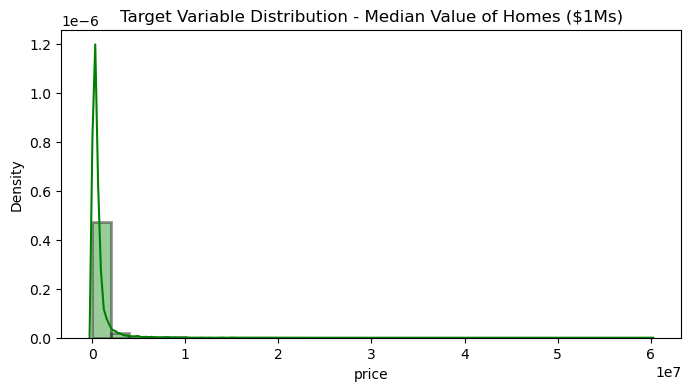

In [36]:

#Let us first analyze the distribution of the target variable
target='price'
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

                             Visualizing Categorical Features:                              


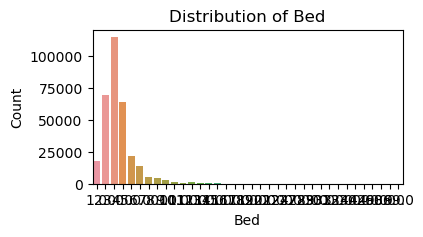

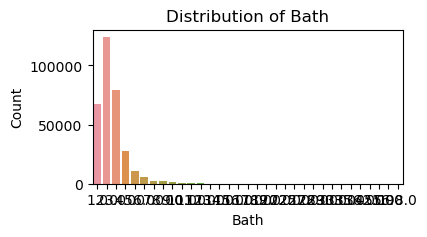

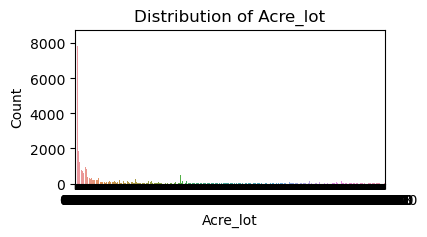

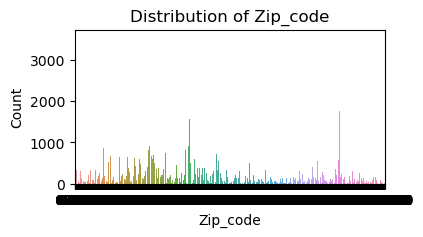

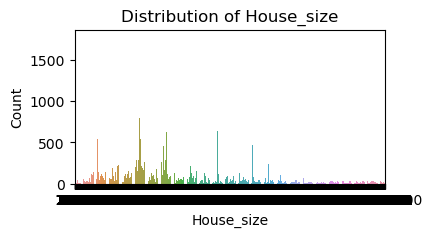

In [37]:


print('\033[1mVisualizing Categorical Features:\033[0m'.center(100))

categorical_features = ['bed', 'bath', 'acre_lot', 'zip_code', 'house_size']

for feature in categorical_features:
    plt.figure(figsize=[4, 2])
    sns.countplot(data=df, x=feature)
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()


<h3> Data  Processing </h3>

In [38]:
df.columns


Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [39]:
df.drop(['status', 'prev_sold_date'], axis=1, inplace=True)



In [40]:
df.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,65000.0


In [41]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Display the null value counts
print(null_counts)


bed           87782
bath          86272
acre_lot      76017
city             52
state             0
zip_code        197
house_size    83525
price             0
dtype: int64


In [42]:
# Drop rows with any null values
df.dropna(axis=0, inplace=True)

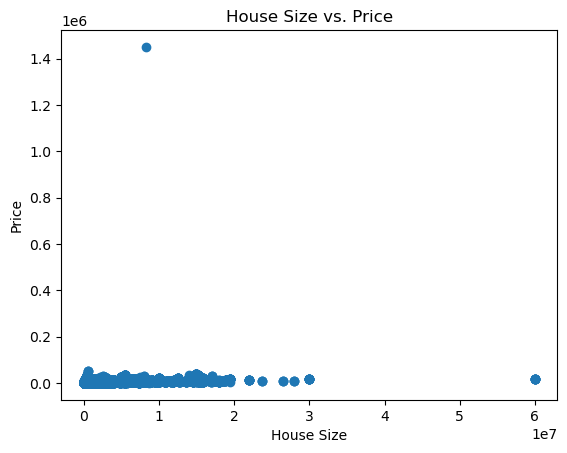

In [43]:
x=df.price
y=df.house_size

plt.scatter(x,y)
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('House Size vs. Price')
plt.show()

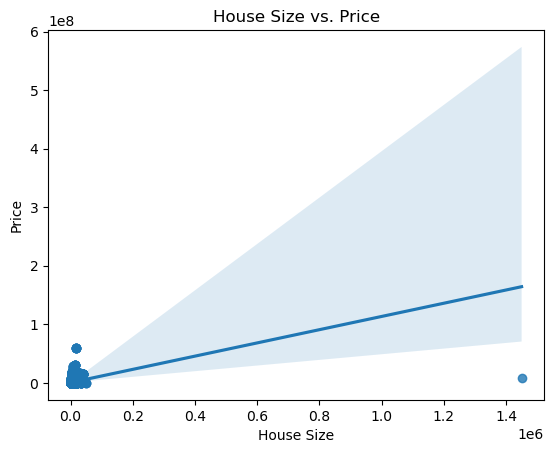

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
sns.regplot(x='house_size', y='price', data=df)
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('House Size vs. Price')

plt.show()


In [45]:


# Split the dataset into features (X) and target variable (y)
X = df[['bed', 'bath','house_size']]
y = df['price']

# Replace missing values in numeric columns with the mean value
numeric_cols = ['bed', 'bath','house_size']
numeric_imputer = SimpleImputer(strategy='mean')
X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust the number of estimators as desired

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


# Set a threshold for classification
threshold = 0.1 * (y.max() - y.min())  # Define a threshold as a percentage of the range of the target variable

# Convert regression predictions to classes based on the threshold
y_pred_class = (abs(y_pred - y_test) <= threshold).astype(int)

# Calculate the accuracy percentage
accuracy = (y_pred_class == 1).mean() * 100

print("Accuracy: {:.2f}%".format(accuracy))

# Input the values for 'bed', 'bath', and 'house_size'
bed = 3
bath = 2
house_size = 1500

# Create a DataFrame with the input values
input_data = pd.DataFrame({'bed': [bed], 'bath': [bath], 'house_size': [house_size]})

# Replace missing values in numeric columns with the mean value
input_data[numeric_cols] = numeric_imputer.transform(input_data[numeric_cols])


# Predict on the input data
y_pred = rf_model.predict(input_data)

print("Predicted Price:", y_pred[0])



C:\Users\kazit\AppData\Local\Temp\ipykernel_18468\2936542657.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = numeric_imputer.fit_transform(X[numeric_cols])


Root Mean Squared Error: 277222.7418775001
Accuracy: 99.98%
Predicted Price: 487939.0616491421
